In [39]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets
import seaborn as sns

In [40]:
X, y = datasets.make_blobs(n_samples=100, centers=2, n_features=2, center_box=(0, 10), random_state=1000)

In [41]:
# print the distinct classes
print(np.unique(y))

[0 1]


In [42]:
# lets change the labels to -1 and 1
y[y == 0] = -1

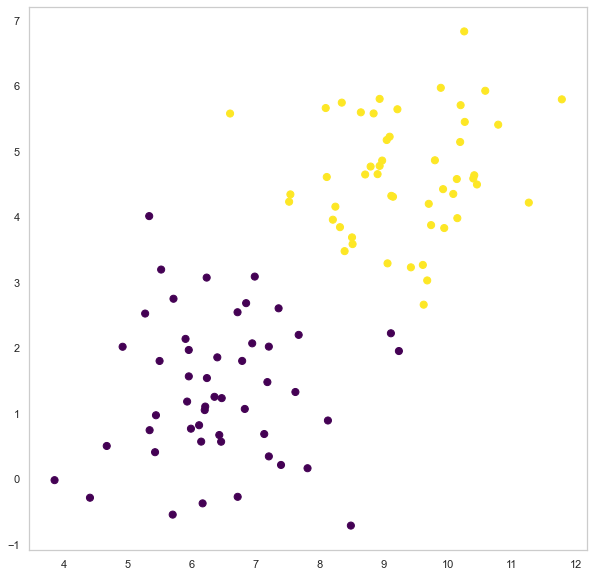

In [43]:
# Plot the data
sns.set()
sns.set_style("whitegrid")
# set figure size
plt.figure(figsize=(10, 10))
# turn grid off
plt.grid(False)
# turn scale off
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='viridis')
plt.show()


In [44]:
# lets augument the data
X = np.c_[X, np.ones(X.shape[0])]

In [45]:
print(X[:10])

[[10.0850635   4.35004635  1.        ]
 [ 6.11302538  0.81966888  1.        ]
 [ 9.23554171  1.95209395  1.        ]
 [ 7.519972    4.23150309  1.        ]
 [ 6.2010604   1.05058773  1.        ]
 [ 7.13093136  0.68540191  1.        ]
 [10.1928101   5.14329277  1.        ]
 [ 8.20326639  3.95689153  1.        ]
 [ 7.61813666  1.32673975  1.        ]
 [ 5.95173163  1.96831913  1.        ]]


In [46]:
def batchGD(X, y, w_init=None, eta=0.5, epochs=1000):
    """
    Perceptron learning algorithm.

    Parameters
    ----------
    X : array-like, shape = [n_samples, n_features]
        Training vector, where n_samples in the number of samples and
        n_features is the number of features.
    y : array-like, shape = [n_samples]
        Target vector relative to X.
    eta : float
        Learning rate (between 0.0 and 1.0)
    epochs : int
        Passes over the training dataset.

    Returns
    -------
    w : array-like, shape = [n_features + 1]
        Weights after fitting.
    errors : list
        Number of misclassifications in every epoch.

    """
    if w_init is None:
        w = np.zeros(X.shape[1])
    else:
        w = w_init

    errors = []
    weights = []
    for epoch in range(epochs):
        e = 0
        delta = 0
        for i, x in enumerate(X):
            if (np.dot(X[i], w) * y[i]) <= 0:
                delta -= X[i] * y[i]
                e += 1
        w -= eta * delta
        errors.append(e)
        # print("W=", w)
        weights.append(list(w))
        # print("-----------------------------")
        # print(weights)
        if epoch % 10 == 0:
            print("epoch: ", epoch, "error: ", e)
        if e == 0:
            break
    print("epoch: ", epoch, "error: ", e)

    return weights, errors

In [54]:
weights, errors = batchGD(X, y, eta=0.01, epochs=1000)
#print(weights)

epoch:  0 error:  100
epoch:  10 error:  17
epoch:  20 error:  42
epoch:  30 error:  22
epoch:  40 error:  26
epoch:  50 error:  23
epoch:  60 error:  20
epoch:  70 error:  22
epoch:  80 error:  19
epoch:  90 error:  20
epoch:  100 error:  26
epoch:  110 error:  17
epoch:  120 error:  15
epoch:  130 error:  27
epoch:  140 error:  16
epoch:  150 error:  23
epoch:  160 error:  22
epoch:  170 error:  22
epoch:  180 error:  21
epoch:  190 error:  16
epoch:  200 error:  16
epoch:  210 error:  20
epoch:  220 error:  15
epoch:  230 error:  21
epoch:  240 error:  15
epoch:  250 error:  20
epoch:  260 error:  18
epoch:  270 error:  19
epoch:  280 error:  19
epoch:  290 error:  17
epoch:  300 error:  19
epoch:  310 error:  15
epoch:  320 error:  9
epoch:  330 error:  8
epoch:  340 error:  9
epoch:  350 error:  18
epoch:  360 error:  7
epoch:  370 error:  7
epoch:  380 error:  7
epoch:  390 error:  33
epoch:  400 error:  13
epoch:  410 error:  12
epoch:  420 error:  13
epoch:  430 error:  14
epoc

In [49]:
# using the weights to plot the decision boundary
if len(weights) < 100:
    columns = 7
    rows = len(weights) // columns + 1
    fig, ax = plt.subplots(rows, columns, figsize=(50, 50))
    for i in range(len(weights)):
        w = weights[i]
        x1 = np.linspace(0, 15, 2)
        x2 = -(w[0] * x1 + w[2]) / w[1]
        ax[i//7, i%7].plot(x1, x2)
        # plt the data
        ax[i//7, i%7].scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='viridis')
        # turn grid off
        ax[i//7, i%7].grid(False)
    

    # remove the empty subplots
    for i in range(rows):
        for j in range(columns):
            if ax[i, j].has_data() == False:
                ax[i, j].axis('off')



In [50]:
# creating each plot and saving it
import os
import shutil
path = os.path.join(os.getcwd(), 'plots-02')
if not os.path.exists(path):
    os.makedirs(path)
    
# remove the old plots from plot folder
for filename in os.listdir('plots-02'):
    file_path = os.path.join('plots-02', filename)
    try:
        if os.path.isfile(file_path) or os.path.islink(file_path):
            os.unlink(file_path)
        elif os.path.isdir(file_path):
            shutil.rmtree(file_path)
    except Exception as e:
        print('Failed to delete %s. Reason: %s' % (file_path, e))
# save the plots
for i in range(len(weights)):
    w = weights[i]
    x1 = np.linspace(0, 15, 2)
    x2 = -(w[0] * x1 + w[2]) / w[1]
    # plot two subplots in one figure
    # one for data and other for the loss function
    fig, ax1 = plt.subplots(figsize=(15, 15))
    ax1.plot(x1, x2)
    ax1.scatter(X[:, 0], X[:, 1], s=100, c=y, cmap='viridis')
    ax1.grid(False)
    # remove axis scale numbers not the border
    ax1.set_yticklabels([])
    ax1.set_xticklabels([])
    # add iteration number
    ax1.text(0.1, 0.3, str(i), fontsize=50, horizontalalignment='center', verticalalignment='center', transform=ax1.transAxes)
    # plot errors till current iteration
    l, b, h, w = .15, .65, .2, .3
    ax2 = fig.add_axes([l, b, w, h])
    # define x axis to be same for all plots
    ax2.set_xlim(0, len(errors))
    ax2.plot(errors[:i+1])
    ax2.set_xlabel('epoch')
    ax2.set_ylabel('error')
    

    # write the current loss value
    ax2.text(0.4, 0.6, 'loss: %.2f' % errors[i], fontsize=20,
             horizontalalignment='center', verticalalignment='center',
             transform=ax2.transAxes)
   
    ax2.axis('off')

    ax2.grid(False)


    filename = os.path.join(path, str(i) + '.png')
    plt.savefig(filename)
    plt.savefig(filename, dpi=100)
    # clear the plot
    plt.clf()
    plt.close()
    


In [53]:
# delete the old perceptron.gif
for filename in os.listdir('.'):
    if filename == 'batchGD.gif':
        os.remove(filename)


# create a gif from the plots
import imageio
images = []
filenames = [filename for filename in os.listdir('plots-02')]
# sort the filenames based on the iteration number
filenames.sort(key=lambda x: int(x.split('.')[0]))
for filename in filenames:
    images.append(imageio.imread(os.path.join('plots-02', filename)))


imageio.mimsave('batchGD.gif', images, duration=0.1)




In [55]:
# show the gif
import matplotlib.animation as animation
from IPython.display import HTML


# display the gif

HTML('<img src="{}">'.format('batchGD.gif'))


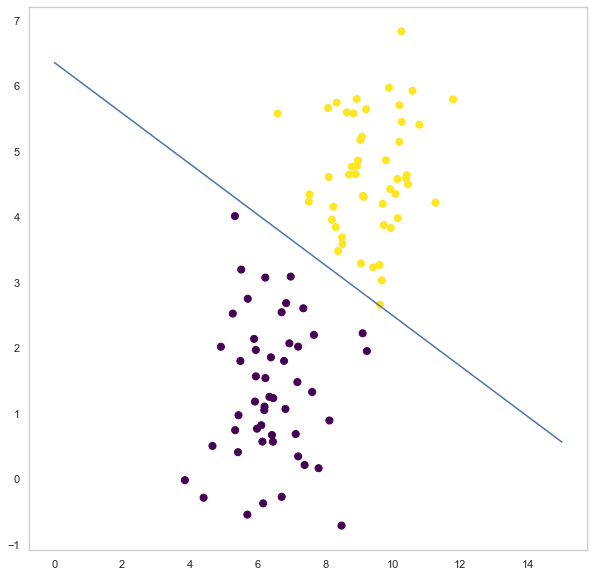

In [ ]:
# final plot of the data and the decision boundary
plt.figure(figsize=(10, 10))
plt.grid(False)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='viridis')
w = weights[-1]
x1 = np.linspace(0, 15, 2)
x2 = -(w[0] * x1 + w[2]) / w[1]
plt.plot(x1, x2)
plt.show()
